In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./engagement_2023_h2.xlsx
./.gitignore
./engagement_dataset_cleaned.csv
./countries_clamped.csv
./all-weeks-global.xlsx
./engagement_dataset_cleaning.ipynb
./imdb_movie_rating_dataset.csv
./countries_globals_eda.ipynb
./clamp_2023.py
./tiltes_netflix_shows_movies.csv
./Data_Science_Project_Synopsis.pdf
./engagement_2023_h2.bak
./most-popular_all_time.csv
./engagement_2023_h1_plus.csv
./all-weeks-countries.xlsx
./global_clamped.csv
./netflix_engagement_2023_h2.csv
./exploratory_analysis.ipynb
./engagement_2023_h1.bak
./engagement_2023_h1.xlsx
./.git/index
./.git/config
./.git/description
./.git/COMMIT_EDITMSG
./.git/HEAD
./.git/objects/3e/1b8ef8eb0248f278aa1d9b76286e94edb26071
./.git/objects/34/3b8ae5a85e0b9f588dbc2d0f5cced6d8d188d2
./.git/objects/34/1f6a8d66cf652e208c679b9056e0c7b2d17190
./.git/objects/26/3a43ce456acc07b8ac6ceca43f6337b2f89c82
./.git/objects/85/c80e3e97f0ab3ceb0c7c6177ddc0a724cb7db5
./.git/objects/a6/3c642e3129f56fc175e4882d43269a93f18175
./.git/objects/f8/144cd2282ed7

**STEP 1 - Identify the Issue**

In this project we are going to analyze Netflix’s data to discover some intresting statistics about the TV shows, films and many more such as highest cumulative weeks in top 10

**STEP 2 - Importing Libraries**

In [3]:
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors

**STEP 3 - Explore the Dataset**

In [5]:
# Importing dataset
weeks_countries = pd.read_csv('countries_clamped.csv', encoding='latin')
weeks_countries

Unnamed: 0 country_name country_iso2        week category  weekly_rank  \
0             200    Argentina           AR  2023-12-31    Films            1   
1             201    Argentina           AR  2023-12-31    Films            2   
2             202    Argentina           AR  2023-12-31    Films            3   
3             203    Argentina           AR  2023-12-31    Films            4   
4             204    Argentina           AR  2023-12-31    Films            5   
...           ...          ...          ...         ...      ...          ...   
98575      261395      Vietnam           VN  2023-01-01       TV            6   
98576      261396      Vietnam           VN  2023-01-01       TV            7   
98577      261397      Vietnam           VN  2023-01-01       TV            8   
98578      261398      Vietnam           VN  2023-01-01       TV            9   
98579      261399      Vietnam           VN  2023-01-01       TV           10   

                                     show_title  \
0      Rebel Moon â Part One: A Child of Fire   
1                The Boss Baby: Family Business   
2                                         Norma   
3                              The Book of Life   
4                        Leave the World Behind   
...                                         ...   
98575                            Emily in Paris   
98576                     Story of Yanxi Palace   
98577                       Alice in Borderland   
98578                          Alchemy of Souls   
98579                 The Witcher: Blood Origin   

                                    season_title  cumulative_weeks_in_top_10  
0                                            NaN                           2  
1                                            NaN                           1  
2                                            NaN                           2  
3                                            NaN                           1  
4                                            NaN                           4  
...                                          ...                         ...  
98575                   Emily in Paris: Season 3                           2  
98576            Story of Yanxi Palace: Season 1                           2  
98577              Alice in Borderland: Season 1                           5  
98578                   Alchemy of Souls: Part 1                          18  
98579  The Witcher: Blood Origin: Limited Series                           1  

[98580 rows x 9 columns]

In [6]:
# Basic information about the dataset
weeks_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98580 entries, 0 to 98579
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  98580 non-null  int64 
 1   country_name                98580 non-null  object
 2   country_iso2                98580 non-null  object
 3   week                        98580 non-null  object
 4   category                    98580 non-null  object
 5   weekly_rank                 98580 non-null  int64 
 6   show_title                  98580 non-null  object
 7   season_title                47295 non-null  object
 8   cumulative_weeks_in_top_10  98580 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 6.8+ MB


['week'] should be of the datatype datetime. So, we will change the datatype of this.

In [7]:
# Show all unique countries
print(f'\033[1mNumber of Unique Countries\033[0m: {weeks_countries.country_name.nunique()}\n\n\033[1mUnique Countries\033[0m:\n {weeks_countries.country_name.unique()}')

Number of Unique Countries: 93

Unique Countries:
 ['Argentina' 'Australia' 'Austria' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Belgium' 'Bolivia' 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Guadeloupe' 'Guatemala' 'Honduras'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kenya' 'Kuwait' 'Latvia' 'Lebanon'
 'Lithuania' 'Luxembourg' 'Malaysia' 'Maldives' 'Malta' 'Martinique'
 'Mauritius' 'Mexico' 'Morocco' 'Netherlands' 'New Caledonia'
 'New Zealand' 'Nicaragua' 'Nigeria' 'Norway' 'Oman' 'Pakistan' 'Panama'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar' 'Romania'
 'RÃ©union' 'Saudi Arabia' 'Serbia' 'Singapore' 'Slovakia' 'Slovenia'
 'South Africa' 'South Korea' 'Spain' 'Sri Lanka' 'Sweden' 'Switzerland'
 'Taiwan' 'Thailand' 'Trinidad and Tobago' 'Turkey'

In [8]:
# Show the total of unique values in each columns.
for i in weeks_countries.columns:
    
    BOLD = '\033[1m'
    RESET = '\033[0m'
    print(BOLD + i + RESET)
    
    print(weeks_countries[i].nunique(), '\n')

Unnamed: 0
98580 

country_name
93 

country_iso2
93 

week
53 

category
2 

weekly_rank
10 

show_title
3547 

season_title
1022 

cumulative_weeks_in_top_10
105 



In [9]:
# Shape, Columns name, Total of null values, and Description of the columns of the dataset 
print(f'\033[1mShape\033[0m:\n{weeks_countries.shape}\n\n\033[1mColumns name in the dataset\033[0m:\n{weeks_countries.columns}\n\n\033[1mTotal of null values\033[0m:\n{weeks_countries.isnull().sum()}\n\n\033[1mDescription of the columns\033[0m:\n{weeks_countries.describe()}')

Shape:
(98580, 9)

Columns name in the dataset:
Index(['Unnamed: 0', 'country_name', 'country_iso2', 'week', 'category',
       'weekly_rank', 'show_title', 'season_title',
       'cumulative_weeks_in_top_10'],
      dtype='object')

Total of null values:
Unnamed: 0                        0
country_name                      0
country_iso2                      0
week                              0
category                          0
weekly_rank                       0
show_title                        0
season_title                  51285
cumulative_weeks_in_top_10        0
dtype: int64

Description of the columns:
         Unnamed: 0   weekly_rank  cumulative_weeks_in_top_10
count   98580.00000  98580.000000                98580.000000
mean   130622.61828      5.500000                    3.560103
std     75930.53720      2.872296                    7.524924
min       200.00000      1.000000                    1.000000
25%     65324.75000      3.000000                    1.000000
50%   

There are 124155 null values in the ['season_title']

**STEP 4 - Modify the Dataset**

In [10]:
# Changing the data type of [‘week’]
weeks_countries['week'] = pd.to_datetime(weeks_countries['week'])
# Adding some columns ['year','month','week_number']
weeks_countries['month']=weeks_countries['week'].dt.month_name()
weeks_countries['week_number'] = weeks_countries['week'].dt.strftime('%U')
weeks_countries['week_number'] = weeks_countries['week_number'].astype('int32')
weeks_countries['year'] = weeks_countries['week'].dt.year
weeks_countries

Unnamed: 0 country_name country_iso2       week category  weekly_rank  \
0             200    Argentina           AR 2023-12-31    Films            1   
1             201    Argentina           AR 2023-12-31    Films            2   
2             202    Argentina           AR 2023-12-31    Films            3   
3             203    Argentina           AR 2023-12-31    Films            4   
4             204    Argentina           AR 2023-12-31    Films            5   
...           ...          ...          ...        ...      ...          ...   
98575      261395      Vietnam           VN 2023-01-01       TV            6   
98576      261396      Vietnam           VN 2023-01-01       TV            7   
98577      261397      Vietnam           VN 2023-01-01       TV            8   
98578      261398      Vietnam           VN 2023-01-01       TV            9   
98579      261399      Vietnam           VN 2023-01-01       TV           10   

                                     show_title  \
0      Rebel Moon â Part One: A Child of Fire   
1                The Boss Baby: Family Business   
2                                         Norma   
3                              The Book of Life   
4                        Leave the World Behind   
...                                         ...   
98575                            Emily in Paris   
98576                     Story of Yanxi Palace   
98577                       Alice in Borderland   
98578                          Alchemy of Souls   
98579                 The Witcher: Blood Origin   

                                    season_title  cumulative_weeks_in_top_10  \
0                                            NaN                           2   
1                                            NaN                           1   
2                                            NaN                           2   
3                                            NaN                           1   
4                                            NaN                           4   
...                                          ...                         ...   
98575                   Emily in Paris: Season 3                           2   
98576            Story of Yanxi Palace: Season 1                           2   
98577              Alice in Borderland: Season 1                           5   
98578                   Alchemy of Souls: Part 1                          18   
98579  The Witcher: Blood Origin: Limited Series                           1   

          month  week_number  year  
0      December           53  2023  
1      December           53  2023  
2      December           53  2023  
3      December           53  2023  
4      December           53  2023  
...         ...          ...   ...  
98575   January            1  2023  
98576   January            1  2023  
98577   January            1  2023  
98578   January            1  2023  
98579   January            1  2023  

[98580 rows x 12 columns]

In [11]:
# Filtering data to search for ['year'] = 2023
trimmed_weeks_countries = weeks_countries[weeks_countries['year'] == 2023]
trimmed_weeks_countries.head(10)

Unnamed: 0 country_name country_iso2       week category  weekly_rank  \
0         200    Argentina           AR 2023-12-31    Films            1   
1         201    Argentina           AR 2023-12-31    Films            2   
2         202    Argentina           AR 2023-12-31    Films            3   
3         203    Argentina           AR 2023-12-31    Films            4   
4         204    Argentina           AR 2023-12-31    Films            5   
5         205    Argentina           AR 2023-12-31    Films            6   
6         206    Argentina           AR 2023-12-31    Films            7   
7         207    Argentina           AR 2023-12-31    Films            8   
8         208    Argentina           AR 2023-12-31    Films            9   
9         209    Argentina           AR 2023-12-31    Films           10   

                                 show_title season_title  \
0  Rebel Moon â Part One: A Child of Fire          NaN   
1            The Boss Baby: Family Business          NaN   
2                                     Norma          NaN   
3                          The Book of Life          NaN   
4                    Leave the World Behind          NaN   
5                              Pretty Woman          NaN   
6                         Good Will Hunting          NaN   
7                                Permitidos          NaN   
8            How the Grinch Stole Christmas          NaN   
9                            Gone Baby Gone          NaN   

   cumulative_weeks_in_top_10     month  week_number  year  
0                           2  December           53  2023  
1                           1  December           53  2023  
2                           2  December           53  2023  
3                           1  December           53  2023  
4                           4  December           53  2023  
5                           1  December           53  2023  
6                           2  December           53  2023  
7                           2  December           53  2023  
8                           3  December           53  2023  
9                           2  December           53  2023

We will focus on processing the data for 2023 only.

**STEP 5 - Handle Missing / Invalid Values**

In [12]:
# Changing the value in the ['category’] that is not appropriate
trimmed_weeks_countries.loc[trimmed_weeks_countries['show_title']=='Persona: Sulli', 'category'] = 'TV'
# Fill 'Unknown' to ['season_title'] where category = TV
trimmed_weeks_countries.loc[(trimmed_weeks_countries['category']=='TV') & (trimmed_weeks_countries['season_title'].isnull()), 'season_title'] = 'Unknown'
# fill 'Non-TV Show' to null value in ['season_title'] where ['category'] = Films
trimmed_weeks_countries.loc[(trimmed_weeks_countries['category']=='Films') & (trimmed_weeks_countries['season_title'].isnull()), 'season_title'] = 'Non-TV Show'
trimmed_weeks_countries.isnull().sum()

Unnamed: 0                    0
country_name                  0
country_iso2                  0
week                          0
category                      0
weekly_rank                   0
show_title                    0
season_title                  0
cumulative_weeks_in_top_10    0
month                         0
week_number                   0
year                          0
dtype: int64

Now we can see there is no null value anymore

In [13]:
trimmed_weeks_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98580 entries, 0 to 98579
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  98580 non-null  int64         
 1   country_name                98580 non-null  object        
 2   country_iso2                98580 non-null  object        
 3   week                        98580 non-null  datetime64[ns]
 4   category                    98580 non-null  object        
 5   weekly_rank                 98580 non-null  int64         
 6   show_title                  98580 non-null  object        
 7   season_title                98580 non-null  object        
 8   cumulative_weeks_in_top_10  98580 non-null  int64         
 9   month                       98580 non-null  object        
 10  week_number                 98580 non-null  int32         
 11  year                        98580 non-null  int32     

Now we can see the data types are all appropriate

**STEP 6 - Analyze and Visualization**

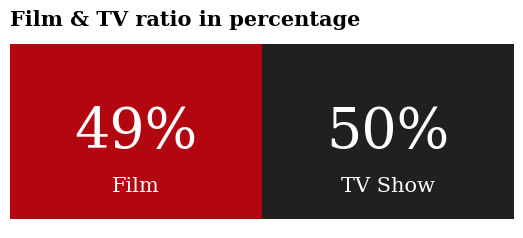

In [14]:
# create dataframe
ratio_category = trimmed_weeks_countries.groupby('category', as_index=False).agg(category_cnt=('category','count'))
ratio_category

# calculate the total and percentage for each category
total = ratio_category['category_cnt'].sum()
ratio_category['percent'] = ratio_category['category_cnt'] / total * 100

# plot the horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(6.5, 2.5))
ax.barh(' ', ratio_category[ratio_category['category'] == 'Films']['percent'], 
        color='#b20710', label='Films')
ax.barh(' ', ratio_category[ratio_category['category'] == 'TV']['percent'], left=ratio_category[ratio_category['category'] == 'Films']['percent'], 
        color='#221f1f', label='TV')

ax.set_xlim(0, 100)
ax.set_xticks([])
ax.set_yticks([])

# annotate the bars
ax.annotate(f"{int(ratio_category[ratio_category['category'] == 'Films']['percent'].values[0])}%", 
                   xy=(ratio_category[ratio_category['category'] == 'Films']['percent'].values[0]/2, 0),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

ax.annotate("Film", 
                   xy=(ratio_category[ratio_category['category'] == 'Films']['percent'].values[0]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')


ax.annotate(f"{int(ratio_category[ratio_category['category'] == 'TV']['percent'].values[0])}%", 
                   xy=(ratio_category[ratio_category['category'] == 'Films']['percent'].values[0] + ratio_category[ratio_category['category'] == 'TV']['percent'].values[0]/2, 0),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

ax.annotate("TV Show", 
                   xy=(ratio_category[ratio_category['category'] == 'Films']['percent'].values[0] + ratio_category[ratio_category['category'] == 'TV']['percent'].values[0]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')


# Title & Subtitle
fig.text(0.125,0.92,'Film & TV ratio in percentage',fontfamily='serif',fontsize=15, fontweight='bold')  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

We can see the percentage of Film and TV Shows is very close

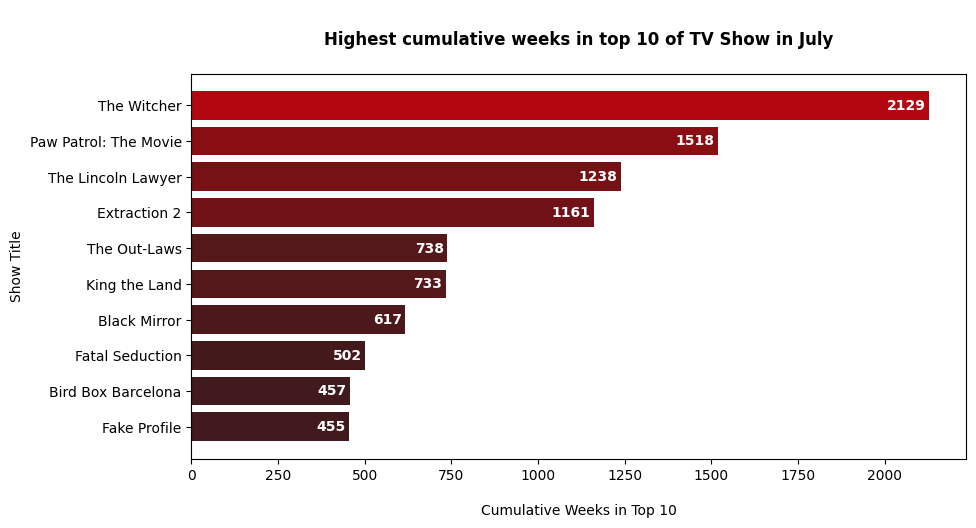

In [15]:
# Show highest cumulative weeks in top 10 of TV Show in July
july_cum = trimmed_weeks_countries.loc[trimmed_weeks_countries['month'].str.contains('July')].groupby('show_title')['cumulative_weeks_in_top_10'].sum().sort_values(ascending= False).reset_index()
july_cum = july_cum.head(10).sort_values('cumulative_weeks_in_top_10', ascending= True)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", ["#221f1f", "#b20710"])

# Plot the horizontal bar chart with the custom colormap
fig = plt.figure(figsize=(10,5))
plt.barh(july_cum['show_title'], july_cum['cumulative_weeks_in_top_10'], color=cmap(july_cum['cumulative_weeks_in_top_10']/july_cum['cumulative_weeks_in_top_10'].max()))
plt.xlabel(f'\nCumulative Weeks in Top 10')
plt.ylabel('Show Title')
plt.title(f'\nHighest cumulative weeks in top 10 of TV Show in July\n', fontweight='bold');

for bar in plt.gca().patches:
    h = bar.get_height()
    w = bar.get_width()
    x = w - 10
    y = bar.get_y() + h / 2
    text = str(w)
    plt.text(x, y, text, color='white', fontweight='bold', horizontalalignment='right', verticalalignment='center')

The Witcher is the TV show that get highest cumulative weeks in top 10 in July

In [16]:
# Function for selecting any country
def country(trimmed_weeks_countries, country_name):
    
    country = trimmed_weeks_countries[trimmed_weeks_countries['country_name'] == country_name]
    
    country_cumulative = country.groupby(['show_title','category'])['cumulative_weeks_in_top_10'].sum().sort_values(ascending=False).reset_index()
    
    country_tv = country[country['category'] == 'TV']
    
    country_tv_cumulative = country_tv.groupby('show_title')['cumulative_weeks_in_top_10'].sum().sort_values(ascending=False).reset_index()
    
    country_film = country[country['category'] == 'Films']
    
    country_film_cumulative = country_film.groupby('show_title')['cumulative_weeks_in_top_10'].sum().sort_values(ascending=False).reset_index()
    
    fig_all = px.bar(country_cumulative.head(10).sort_values('cumulative_weeks_in_top_10', ascending=True), x='cumulative_weeks_in_top_10', y='show_title',
      color='cumulative_weeks_in_top_10', color_continuous_scale=['#221f1f', '#663333', '#8c2a2a', '#b20710'],
      title=f'<b>Highest Cumulative in Top 10 in {country_name}</b>',
      text='cumulative_weeks_in_top_10', orientation='h',width=1000, height=600).update_layout(xaxis_title='Total of Cumulative weeks in Top 10', yaxis_title='Show Title', title_x=0.5)
    
    fig_tv = px.bar(country_tv_cumulative.head(10).sort_values('cumulative_weeks_in_top_10', ascending=True), x="cumulative_weeks_in_top_10", y="show_title",
      color='cumulative_weeks_in_top_10', color_continuous_scale=['#221f1f', '#663333', '#8c2a2a', '#b20710'],
      title=f'<b>Highest Cumulative TV Shows in Top 10 in {country_name}</b>',
      text='cumulative_weeks_in_top_10', orientation='h',width=1000, height=600).update_layout(xaxis_title='Total of Cumulative weeks in Top 10', yaxis_title='Show Title', title_x=0.5)
    
    fig_film = px.bar(country_film_cumulative.head(10).sort_values('cumulative_weeks_in_top_10', ascending=True), x='cumulative_weeks_in_top_10', y='show_title',
      color='cumulative_weeks_in_top_10', color_continuous_scale=['#221f1f', '#663333', '#8c2a2a', '#b20710'],
      title=f'<b>Highest Cumulative Film in Top 10 in {country_name}</b>',
      text='cumulative_weeks_in_top_10', orientation='h', width=1000, height=600).update_layout(xaxis_title='Total of Cumulative weeks in Top 10', yaxis_title='Show Title', title_x=0.5)
    
    return country, country_cumulative, country_tv, country_tv_cumulative, country_film, country_film_cumulative, fig_all, fig_tv, fig_film

In [17]:
# Show highest cumulative in top 10 in United States
us_df, us_cumulative, us_tv, us_tv_cumulative, us_film, us_film_cumulative, us_fig_all, us_fig_tv, us_fig_film  = country(trimmed_weeks_countries, 'United States')

In [18]:
us_cumulative

show_title category  cumulative_weeks_in_top_10
0                          Sing 2    Films                         338
1                           Suits       TV                         135
2                 Despicable Me 2    Films                          80
3                       Wednesday       TV                          76
4                   New Amsterdam       TV                          58
..                            ...      ...                         ...
455        Unknown: Cave of Bones    Films                           1
456  Unknown: Cosmic Time Machine    Films                           1
457      85 South: Ghetto Legends       TV                           1
458                      47 Ronin    Films                           1
459                13 Going on 30    Films                           1

[460 rows x 3 columns]

In [19]:
us_fig_all

"Sing 2" get the highest cumulative weeks in top 10 for both TV Show and Film in United States

In [20]:
# Show highest cumulative in top 10 in Indonesia
id_df, id_cumulative, id_tv, id_tv_cumulative, id_film, id_film_cumulative, id_fig_all, id_fig_tv, id_fig_film  = country(trimmed_weeks_countries, 'Indonesia')

In [21]:
id_film_cumulative

show_title  cumulative_weeks_in_top_10
0                        Stealing Raden Saleh                          91
1                                   The Big 4                          52
2                           F9: The Fast Saga                          45
3                                   Uncharted                          22
4                                      Hunger                          21
..                                        ...                         ...
242                                   Upgrade                           1
243  You Are So Not Invited to My Bat Mitzvah                           1
244                               World War Z                           1
245                                You People                           1
246                 iNumber Number: Jozi Gold                           1

[247 rows x 2 columns]

In [22]:
id_fig_film

"Stealing Raden Saleh" get the highest cumulative weeks in top 10 for Film in Indonesia

In [23]:
# Function for selecting any title
def title(trimmed_weeks_countries, show_title):
    
    title = trimmed_weeks_countries[trimmed_weeks_countries['show_title'] == show_title]
    
    title_cumulative = title.groupby(['show_title','country_name'])['cumulative_weeks_in_top_10'].sum().sort_values(ascending=False).reset_index()
    
    title_fig = px.bar(title_cumulative.head(10).sort_values('cumulative_weeks_in_top_10', ascending=False), x='country_name', y='cumulative_weeks_in_top_10',
      color="cumulative_weeks_in_top_10", color_continuous_scale=['#221f1f', '#663333', '#8c2a2a', '#b20710'],
      title=f'<b>Highest Cumulative in Top 10 of "{show_title}" in 2023</b>',
      text='cumulative_weeks_in_top_10',width=1000, height=600).update_layout(xaxis_title='Country Name', yaxis_title='Total of Cumulative weeks in Top 10', title_x=0.5)
    
    return title, title_cumulative, title_fig

In [25]:
# "The Glory" data
theglory_df, theglory_cumulative, theglory_fig  = title(trimmed_weeks_countries, "The Glory")

In [26]:
theglory_cumulative

show_title country_name  cumulative_weeks_in_top_10
0   The Glory    Hong Kong                         253
1   The Glory      Vietnam                         231
2   The Glory    Indonesia                         210
3   The Glory    Singapore                         190
4   The Glory  South Korea                         190
..        ...          ...                         ...
86  The Glory       Latvia                           1
87  The Glory     Slovenia                           1
88  The Glory       Serbia                           1
89  The Glory       Sweden                           1
90  The Glory        Spain                           1

[91 rows x 3 columns]

In [27]:
theglory_fig

“The Glory” was very popular in Hong Kong. Throughout the year 2023, it managed to occupy the Top 10 for 253 weeks.

In [28]:
# "Alice in Borderland" data
AiB_df, AiB_cumulative, AiB_fig  = title(trimmed_weeks_countries, "Alice in Borderland")

In [29]:
AiB_cumulative

show_title  country_name  cumulative_weeks_in_top_10
0   Alice in Borderland    Bangladesh                          80
1   Alice in Borderland      Pakistan                          57
2   Alice in Borderland     Hong Kong                          35
3   Alice in Borderland        Turkey                          31
4   Alice in Borderland   Philippines                          31
..                  ...           ...                         ...
86  Alice in Borderland        Poland                           2
87  Alice in Borderland     Venezuela                           2
88  Alice in Borderland  South Africa                           2
89  Alice in Borderland       Ireland                           1
90  Alice in Borderland   South Korea                           1

[91 rows x 3 columns]

In [30]:
AiB_fig

“Alice in Borderland” was popular in Bangladesh. Throughout the year 2023, it managed to occupy the Top 10 for 80 weeks.